In [1]:
!pip install textblob
!pip install tweepy
!pip install pycountry
!pip install langdetect

     |████████████████████████████████| 10.1MB 6.9MB/s 
  Created wheel for pycountry: filename=pycountry-20.7.3-py2.py3-none-any.whl size=10746883 sha256=a1a2aa4da03dec642b3e6264e618c1b8d435ebdeefdb7d92d9ee8edb6691935d
  Stored in directory: /root/.cache/pip/wheels/33/4e/a6/be297e6b83567e537bed9df4a93f8590ec01c1acfbcd405348
Successfully built pycountry
     |████████████████████████████████| 983kB 6.8MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.9-cp37-none-any.whl size=993242 sha256=f1c8cff8fad2b4e0a1ab45f48762b6203976af80e433c440ddfed17ede3c8ffa
  Stored in directory: /root/.cache/pip/wheels/7e/18/13/038c34057808931c7ddc6c92d3aa015cf1a498df5a70268996
Successfully built langdetect


### Importing Libraries

In [2]:
from textblob import TextBlob
import sys
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
nltk.download('vader_lexicon')
nltk.download('stopwords')
import pycountry
import re
import string

from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from langdetect import detect
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


## Authentication for Twitter API


> Setting all Twitter API config variables required for authentication with Tweepy.



In [3]:
consumerKey = "qh0PEi9LGbFqrq0bEVx10Eg2d"
consumerSecret = "hoAuH6TQkhLFSBgV50IlwMbYIgZiRr0l6dz6dZHXWcZu8KRIYx"
accessToken = "1403975818217357326-dtrPf2smIz8TptyRXpM3faTCV89HN2"
accessTokenSecret = "9vgGQEW532KDDPOrWsGS89JjGmnoT7nu7rN84az99g2pL"
auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(auth)

## Getting Tweets With Keyword or Hashtag

### Sentiment Analysis

In [4]:
def percentage(part,whole):
 return 100 * float(part)/float(whole)
keyword = input("Please enter keyword or hashtag to search: ")
noOfTweet = int(input ("Please enter how many tweets to analyze: "))
tweets = tweepy.Cursor(api.search, q=keyword).items(noOfTweet)
positive = 0
negative = 0
neutral = 0
polarity = 0
tweet_list = []
neutral_list = []
negative_list = []
positive_list = []
for tweet in tweets:
 
 #print(tweet.text)
 tweet_list.append(tweet.text)
 analysis = TextBlob(tweet.text)
 score = SentimentIntensityAnalyzer().polarity_scores(tweet.text)
 neg = score['neg']
 neu = score['neu']
 pos = score['pos']
 comp = score['compound']
 polarity += analysis.sentiment.polarity
 
 if neg > pos:
  negative_list.append(tweet.text)
  negative += 1
 elif pos > neg:
  positive_list.append(tweet.text)
  positive += 1
 
 elif pos == neg:
  neutral_list.append(tweet.text)
  neutral += 1
positive = percentage(positive, noOfTweet)
negative = percentage(negative, noOfTweet)
neutral = percentage(neutral, noOfTweet)
polarity = percentage(polarity, noOfTweet)
positive = format(positive, '.1f')
negative = format(negative, '.1f')
neutral = format(neutral, '.1f')

Please enter keyword or hashtag to search: BTS
Please enter how many tweets to analyze: 2500


In [5]:
#Number of Tweets (Total, Positive, Negative, Neutral)
tweet_list = pd.DataFrame(tweet_list)
neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)
print("total number: ",len(tweet_list))
print("positive sentiment: ",len(positive_list))
print("negative sentiment: ", len(negative_list))
print("neutral sentiment: ",len(neutral_list))

total number:  2500
positive sentiment:  549
negative sentiment:  189
neutral sentiment:  1762


## Creating PieCart

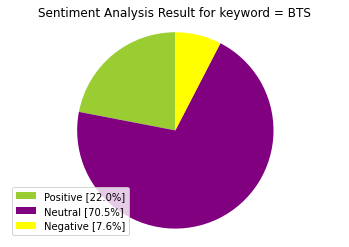

In [6]:
labels = ['Positive ['+str(positive)+'%]' , 'Neutral ['+str(neutral)+'%]','Negative ['+str(negative)+'%]']
sizes = [positive, neutral, negative]
colors = ['yellowgreen', 'purple','yellow']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title("Sentiment Analysis Result for keyword = "+keyword+"" )
plt.axis('equal')
plt.show()

In [7]:
tweet_list

,0
0,RT @jimintoday__: [Teaser] BTS X 서울 E-프리 2022 ...
1,RT @charts_k: [Teaser] #BTS X 서울 E-프리 2022 (SE...
2,RT @BRILLER__613: [Teaser] BTS X 서울 E-프리 2022 ...
3,RT @Army_Connect: We crossed 10K total orders🥳...
4,RT @PJM_data: Emmy Award Winning Comedian John...
...,...
2495,RT @ONLY_MOMENT__V: Fila 인스타스토리 (1)\n\n#방탄소년단 ...
2496,"RT @NicoMar97: K-Media: ""El Campeonato Mundial..."
2497,@MyMoonJin_SG @BTS_twt ojala que si!!!! pero n...
2498,RT @BTSsilver_voice: 월와핸과 세일미가 있는 풍경\n미쳤다 그냥\n...


## Cleaning Tweets to Analyse Sentiment

In [8]:
tweet_list.drop_duplicates(inplace = True)

### Cleaning Text (RT, Punctuation etc), Creating new dataframe and new features, Removing RT, Punctuation etc



> Before starting the sentiment analysis it is a good idea to clean up each tweets from an unnecessary data first.


1. To remove mentions
2. To remove hashtags
3. To remove retweets
4. To remove urls



In [9]:
tw_list = pd.DataFrame(tweet_list)
tw_list["text"] = tw_list[0]

remove_rt = lambda x: re.sub('RT @\w+: '," ",x)
rt = lambda x: re.sub("(@[A-Za-z0–9]+)|([-⁰9A-Za-z \t])|(\w+:\/\/\S+)"," ",x)
tw_list["text"] = tw_list.text.map(remove_rt).map(rt)
tw_list["text"] = tw_list.text.str.lower()
tw_list.head(10)

,0,text
0,RT @jimintoday__: [Teaser] BTS X 서울 E-프리 2022 ...,[ ] 서울 프리 2022 ( 202...
1,RT @charts_k: [Teaser] #BTS X 서울 E-프리 2022 (SE...,[ ] # 서울 프리 2022 ( 20...
2,RT @BRILLER__613: [Teaser] BTS X 서울 E-프리 2022 ...,[ ] 서울 프리 2022 ( 202...
3,RT @Army_Connect: We crossed 10K total orders🥳...,10 🥳🎉🥳\n\n⏰∼2 ...
4,RT @PJM_data: Emmy Award Winning Comedian John...,", ..."
5,RT @ARMYTEAMIID: [🎥]\n\nBTS x SMASH APP\n#방탄소년...,[🎥]\n\n \n#방탄소년단 # _ ...
6,RT @bts_bighit: Are you all excited for #BTS_B...,# _ ...
7,RT @allangyi: 달다구리솜 @_thal_0 님카페 놀러왔어요^^ \n예쁜 ...,달다구리솜 @_ _0 님카페 놀러왔어요^^ \n예쁜 컵홀더랑 선물도 받고 귀...
8,RT @bts_nanak: SONGS 방탄 멘트\n#방탄소년단 #BTS @BTS_t...,방탄 멘트\n#방탄소년단 # _ :// . / ...
9,RT @sunflowercharts: ✅ 364.76 ล้านวิว\n\nเป้าห...,✅ 364.76 ล้านวิว\n\nเป้าหมายต่อไป: 400 ล้านวิ...


## Sentiment Analysis


> Calculating Negative, Positive, Neutral and Compound values



In [10]:
tw_list[['polarity', 'subjectivity']] = tw_list['text'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
for index, row in tw_list['text'].iteritems():
 score = SentimentIntensityAnalyzer().polarity_scores(row)
 neg = score['neg']
 neu = score['neu']
 pos = score['pos']
 comp = score['compound']

 if neg > pos:
   tw_list.loc[index, 'sentiment'] = "negative"
 elif pos > neg:
   tw_list.loc[index, 'sentiment'] = "positive"
 else:
   tw_list.loc[index, 'sentiment'] = "neutral"
   tw_list.loc[index, 'neg'] = neg
   tw_list.loc[index, 'neu'] = neu
   tw_list.loc[index, 'pos'] = pos
   tw_list.loc[index, 'compound'] = comp
tw_list.head(10)

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,RT @jimintoday__: [Teaser] BTS X 서울 E-프리 2022 ...,[ ] 서울 프리 2022 ( 202...,0.0,0.0,neutral,0.0,1.0,0.0,0.0
1,RT @charts_k: [Teaser] #BTS X 서울 E-프리 2022 (SE...,[ ] # 서울 프리 2022 ( 20...,0.0,0.0,neutral,0.0,1.0,0.0,0.0
2,RT @BRILLER__613: [Teaser] BTS X 서울 E-프리 2022 ...,[ ] 서울 프리 2022 ( 202...,0.0,0.0,neutral,0.0,1.0,0.0,0.0
3,RT @Army_Connect: We crossed 10K total orders🥳...,10 🥳🎉🥳\n\n⏰∼2 ...,0.0,0.0,neutral,0.0,1.0,0.0,0.0
4,RT @PJM_data: Emmy Award Winning Comedian John...,", ...",0.0,0.0,neutral,0.0,0.0,0.0,0.0
5,RT @ARMYTEAMIID: [🎥]\n\nBTS x SMASH APP\n#방탄소년...,[🎥]\n\n \n#방탄소년단 # _ ...,0.0,0.0,neutral,0.0,1.0,0.0,0.0
6,RT @bts_bighit: Are you all excited for #BTS_B...,# _ ...,0.0,0.0,neutral,0.0,1.0,0.0,0.0
7,RT @allangyi: 달다구리솜 @_thal_0 님카페 놀러왔어요^^ \n예쁜 ...,달다구리솜 @_ _0 님카페 놀러왔어요^^ \n예쁜 컵홀더랑 선물도 받고 귀...,0.0,0.0,neutral,0.0,1.0,0.0,0.0
8,RT @bts_nanak: SONGS 방탄 멘트\n#방탄소년단 #BTS @BTS_t...,방탄 멘트\n#방탄소년단 # _ :// . / ...,0.0,0.0,neutral,0.0,1.0,0.0,0.0
9,RT @sunflowercharts: ✅ 364.76 ล้านวิว\n\nเป้าห...,✅ 364.76 ล้านวิว\n\nเป้าหมายต่อไป: 400 ล้านวิ...,0.0,0.0,neutral,0.0,1.0,0.0,0.0




> Spliting data frame into 3 groups for all sentiments (positive, negative and neutral)



In [11]:
tw_list_negative = tw_list[tw_list["sentiment"]=="negative"]
tw_list_positive = tw_list[tw_list["sentiment"]=="positive"]
tw_list_neutral = tw_list[tw_list["sentiment"]=="neutral"]

In [12]:
def count_values_in_column(data,feature):
 total=data.loc[:,feature].value_counts(dropna=False)
 percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
 return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])

#Count_values for sentiment
count_values_in_column(tw_list,"sentiment")

,Total,Percentage
neutral,1388,99.21
positive,7,0.50
negative,4,0.29




> Pie Chart


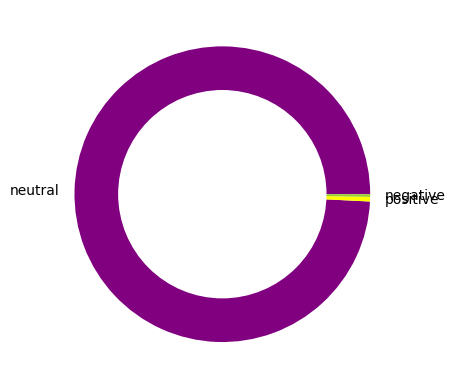

In [13]:
pichart = count_values_in_column(tw_list,"sentiment")
names= pichart.index
size=pichart["Percentage"]
 

my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(size, labels=names, colors=['purple', 'yellow' ,'yellowgreen'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

### Calculating the tweet length and word count to see the density of words and characters used in tweets based on different sentiments.

In [14]:
tw_list['text_len'] = tw_list['text'].astype(str).apply(len)
tw_list['text_word_count'] = tw_list['text'].apply(lambda x: len(str(x).split()))
round(pd.DataFrame(tw_list.groupby("sentiment").text_len.mean()),2)

,text_len
sentiment,
negative,75.00
neutral,92.90
positive,92.14


In [15]:
round(pd.DataFrame(tw_list.groupby("sentiment").text_word_count.mean()),2)

,text_word_count
sentiment,
negative,4.00
neutral,9.59
positive,8.29


## Removing Punctuation and Stopwords and applying Tokenization

In [16]:
#punctuation removal
def remove_punct(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    return text

tw_list['punct'] = tw_list['text'].apply(lambda x: remove_punct(x))


#tokenization
def tokenization(text):
    text = re.split('\W+', text)
    return text

tw_list['tokenized'] = tw_list['punct'].apply(lambda x: tokenization(x.lower()))


#Stopwords Removal
stopword = nltk.corpus.stopwords.words('english')
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text
    
tw_list['nonstop'] = tw_list['tokenized'].apply(lambda x: remove_stopwords(x))

## Applying stemmer to eliminate words that come from the same root

In [17]:
ps = nltk.PorterStemmer()

def stemming(text):
    text = [ps.stem(word) for word in text]
    return text

tw_list['stemmed'] = tw_list['nonstop'].apply(lambda x: stemming(x))

### Text Cleaning

In [18]:
def clean_text(text):
    text_lc = "".join([word.lower() for word in text if word not in string.punctuation]) # remove puntuation
    text_rc = re.sub('[0-9]+', '', text_lc)
    tokens = re.split('\W+', text_rc)    # tokenization
    text = [ps.stem(word) for word in tokens if word not in stopword]  # remove stopwords 
    return text

In [19]:
tw_list.head()

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound,text_len,text_word_count,punct,tokenized,nonstop,stemmed
0,RT @jimintoday__: [Teaser] BTS X 서울 E-프리 2022 ...,[ ] 서울 프리 2022 ( 202...,0.0,0.0,neutral,0.0,1.0,0.0,0.0,120,19,서울 프리 \n ...,"[, 서울, 프리, 방탄소년단, ]","[, 서울, 프리, 방탄소년단, ]","[, 서울, 프리, 방탄소년단, ]"
1,RT @charts_k: [Teaser] #BTS X 서울 E-프리 2022 (SE...,[ ] # 서울 프리 2022 ( 20...,0.0,0.0,neutral,0.0,1.0,0.0,0.0,98,17,서울 프리 \n\n ...,"[, 서울, 프리, ]","[, 서울, 프리, ]","[, 서울, 프리, ]"
2,RT @BRILLER__613: [Teaser] BTS X 서울 E-프리 2022 ...,[ ] 서울 프리 2022 ( 202...,0.0,0.0,neutral,0.0,1.0,0.0,0.0,105,16,서울 프리 \n ...,"[, 서울, 프리, ]","[, 서울, 프리, ]","[, 서울, 프리, ]"
3,RT @Army_Connect: We crossed 10K total orders🥳...,10 🥳🎉🥳\n\n⏰∼2 ...,0.0,0.0,neutral,0.0,1.0,0.0,0.0,123,9,🥳🎉🥳\n\n⏰∼ ...,"[, ]","[, ]","[, ]"
4,RT @PJM_data: Emmy Award Winning Comedian John...,", ...",0.0,0.0,neutral,0.0,0.0,0.0,0.0,127,6,...,"[, ]","[, ]","[, ]"
